In [12]:
import pandas as pd
import requests
import time
from datetime import datetime

# Function to retrieve data from the API
def fetch_data():
    try:
        response = requests.get("https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi")
        data = response.json()
        return data
    except Exception as e:
        print("Error fetching data:", e)
        return None

# Create an empty list to store data
data_list = []
second_to_match = 0

# Run for 60 minutes
for i in range(60):
    print("Minute", i+1)
    data = fetch_data()

    if(i == 0): #find the starting seconds
      time_str = data['time']
      time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
      second_to_match = time_obj.second


    print(data)
    if data:
        # Append retrieved data to list
        data_list.append(data)

    time_str = data['time']
    time_obj = datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
    second_cur = time_obj.second

    if(second_cur == second_to_match):
      time.sleep(59.7)  # Wait for 59.7 seconds before fetching data again, as the rest took on average .3 seconds to exicute
    else:
      if(second_cur - second_to_match > -4):
        time.sleep(59.7 - ((second_cur - second_to_match)/2))
      else:
        x = 60 - ((second_cur + second_to_match)/2)
        time.sleep(59.7-x)

# Convert list of dictionaries to DataFrame
data_df = pd.DataFrame(data_list)

# Analyze the data after 60 minutes
print("Data Analysis:")
print(data_df)

# Additional analysis can be performed using Pandas functions on data_df


Minute 1
{'factor': 185193, 'pi': 3.1415980533619163, 'time': '2024-05-06 00:57:03'}
Minute 2
{'factor': 195112, 'pi': 3.1415875283283916, 'time': '2024-05-06 00:58:03'}
Minute 3
{'factor': 205379, 'pi': 3.141597522636734, 'time': '2024-05-06 00:59:04'}
Minute 4
{'factor': 1, 'pi': 4.0, 'time': '2024-05-06 01:00:03'}
Minute 5
{'factor': 1, 'pi': 4.0, 'time': '2024-05-06 01:01:03'}
Minute 6
{'factor': 8, 'pi': 3.017071817071818, 'time': '2024-05-06 01:02:03'}
Minute 7
{'factor': 27, 'pi': 3.1786170109992202, 'time': '2024-05-06 01:03:03'}
Minute 8
{'factor': 64, 'pi': 3.125968606973288, 'time': '2024-05-06 01:04:03'}
Minute 9
{'factor': 125, 'pi': 3.1495925256000317, 'time': '2024-05-06 01:05:03'}
Minute 10
{'factor': 216, 'pi': 3.1369630487667557, 'time': '2024-05-06 01:06:03'}
Minute 11
{'factor': 343, 'pi': 3.1445080992896712, 'time': '2024-05-06 01:07:03'}
Minute 12
{'factor': 512, 'pi': 3.139639530452431, 'time': '2024-05-06 01:08:02'}
Minute 13
{'factor': 729, 'pi': 3.142964395056

In [3]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///mydatabase.db')
table_name = 'data'
# Export the DataFrame to the SQLite database
data_df.to_sql(table_name, engine, if_exists='replace', index=False)

60

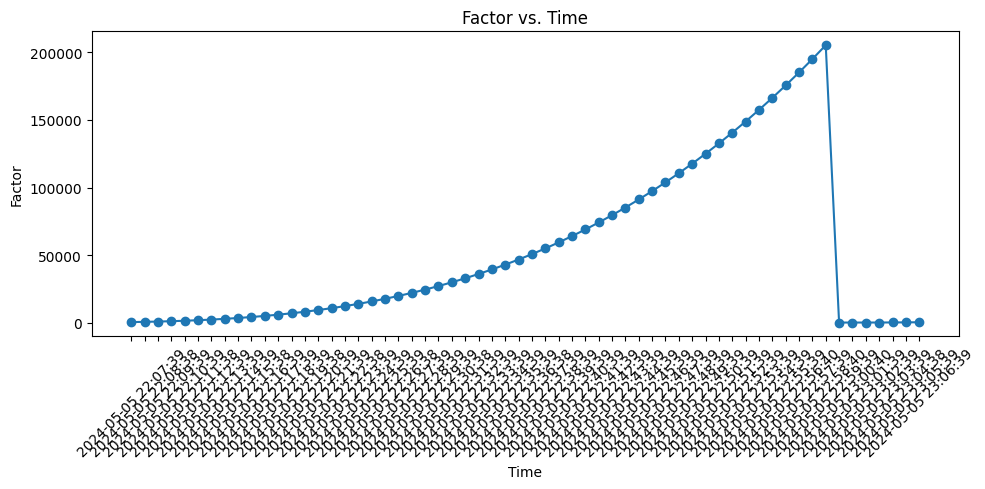

In [5]:
import matplotlib.pyplot as plt

#make the graphs
plt.figure(figsize=(10, 5))
plt.plot(data_df['time'], data_df['factor'], marker='o', linestyle='-')
plt.title('Factor vs. Time')
plt.xlabel('Time')
plt.ylabel('Factor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

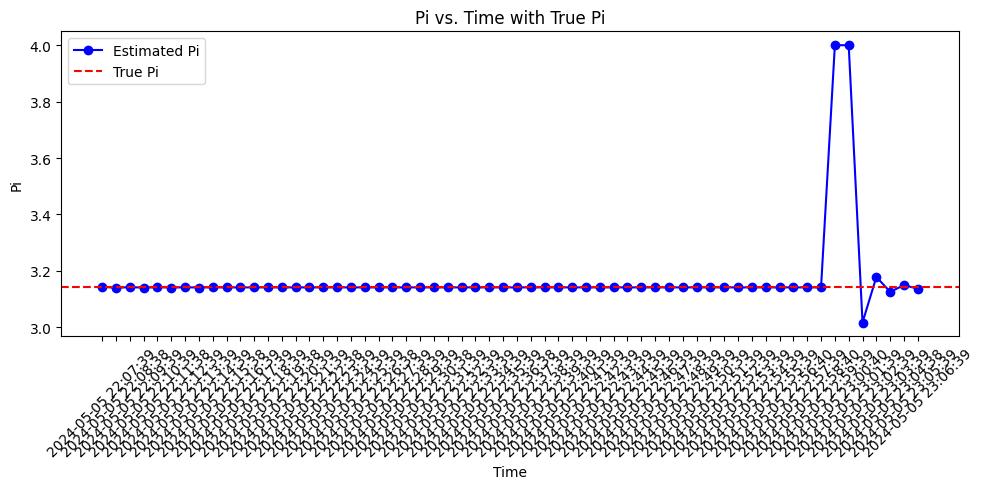

In [7]:
# Plotting Pi vs. Time with True Pi line
plt.figure(figsize=(10, 5))
plt.plot(data_df['time'], data_df['pi'], label='Estimated Pi', color='blue', marker='o', linestyle='-')
plt.axhline(y=3.14159, color='r', linestyle='--', label='True Pi')
plt.title('Pi vs. Time with True Pi')
plt.xlabel('Time')
plt.ylabel('Pi')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

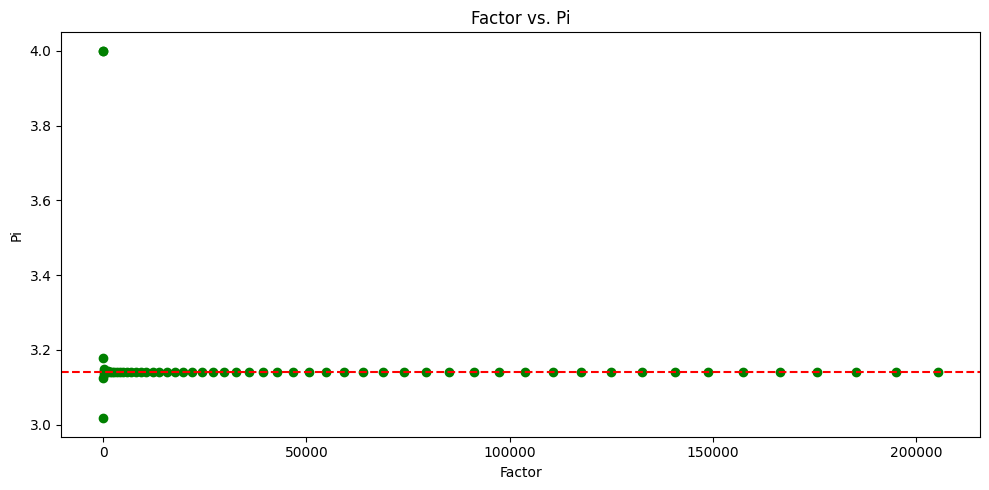

In [10]:
# Plotting Factor vs. Pi
plt.figure(figsize=(10, 5))
plt.scatter(data_df['factor'], data_df['pi'], color='green')
plt.axhline(y=3.14159, color='r', linestyle='--', label='True Pi')
plt.title('Factor vs. Pi')
plt.xlabel('Factor')
plt.ylabel('Pi')
plt.tight_layout()
plt.show()

As time increases, factor increases, until factor resets to 1. This factor is used to estimate the value of pi. The larger the factor, the closer the number is to true pi. In the graphs above you can see this relationship. In an hour The factors loop from 1 to 205379 and the factors are the minute from the start of a cycle cubed, so minute 1 is 1, 2 is 8, 3 is 27 and so on. This is then used as a factor to calculate pi, and it gets closer and closer to the true value.